# #1 Prediction using supervised ML : Linear Regression


TODO : Predicting the percentage of students score based on no. of study hours.

QUESTION : What will be the predicted score if student studies for 9.25hrs/day.

### Linear Regression :
   Linear regression is the most basic and commonly used predictive analysis. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

### Simple Linear Regression :
  In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### TODO
 * Importing all libraries required in this notebook
 * Reading data from downloaded file
 * Plotting the distribution of scores to visualise data
 * Preparing data
 * Training Algorithm
 * Making Predictions
 * Evaluating the model

In [1]:
pip install pandas

In [2]:
pip install numpy

In [3]:
pip install matplotlib

In [4]:
pip install -U scikit-learn

In [5]:
# Importing all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [6]:
# Reading data from downloaded file
stu_data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
stu_data.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
stu_data.shape

(25, 2)

A great way to explore relationships between variables (i.e. hours and scores) is through Scatter plots. We'll plot the hours on the X-axis and scores on the Y-axis, and for each pair, a marker will be positioned based on their values.

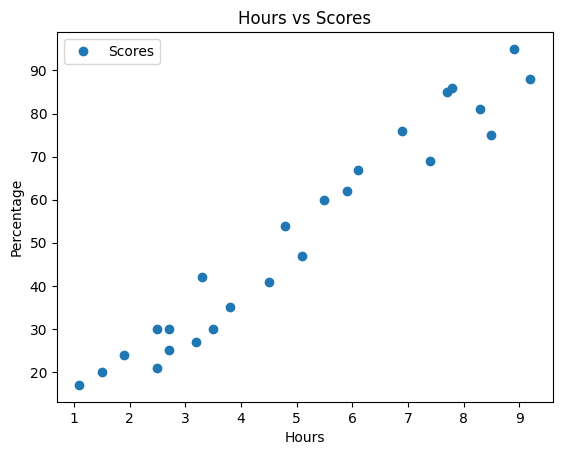

In [8]:
# Plotting the distribution of scores
stu_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

Since the shape of the line the points are making appears to be straight we can say that there's a 'positive linear correlation' between the Hours and Scores variables.
The corr() method calculates and displays the correlations between numerical variables in a DataFrame, to see how much correlated the DataFrame is.

In [9]:
print(stu_data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


From the output above we can see the variables are highly correlated.

Text(0, 0.5, 'Percentage')

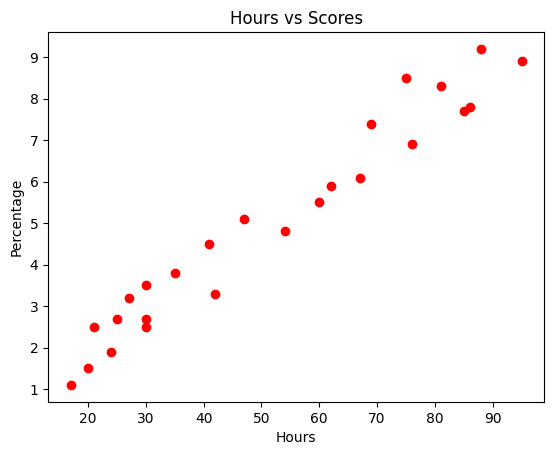

In [10]:
plt.scatter(stu_data.Scores,stu_data.Hours,color='red',marker='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Percentage')

Both the graphs give similer result,the difference between the two functions is: with pyplot. plot() any property you apply (color, shape, size of points) will be applied across all points whereas in pyplot. scatter() you have more control in each point's appearance.

From the graphs above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

**Lets now call great helper method for statistical summaries to get an idea of the mean, maximum, minimum, etc. values of our columns.**

In [11]:
print(stu_data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


Our variables express a linear relationship.

##**Preparing data**

In [12]:
X = stu_data.iloc[:, :-1].values
y = stu_data.iloc[:, 1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

# **Training the Algorithm**

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


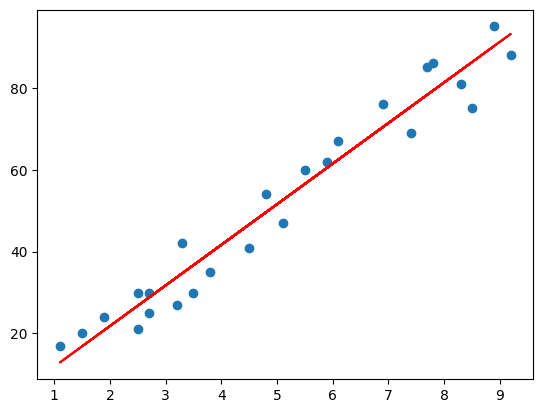

In [15]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='r');
plt.show()

# **Making Predictions**

In [16]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [18]:
# Testing with our own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


#**Evaluating the model**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. We have chosen the mean absolute error, mean squared error,and root mean squared error. There are many such metrics.

In [19]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',
      metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


Thus, from above result with satisfactory error percentage of about 4.64 % we can conclude that the number of study hours is directly proportional to the student scores.
And the predicted score of student who studies 9.25 is about 93.69%.